<a href="https://colab.research.google.com/github/Kathy42xu/DL_TA/blob/main/TryMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MovieLens32M
It contains 32000204 ratings and 2000072 tag applications across 87585 movies

Each user is represented by an id, and no other information is provided.



In [ ]:
import os

os.makedirs('movielens', exist_ok=True)


!wget -O movielens/ml-32m.zip https://files.grouplens.org/datasets/movielens/ml-32m.zip

!unzip movielens/ml-32m.zip -d movielens/


--2024-12-28 19:27:33--  https://files.grouplens.org/datasets/movielens/ml-32m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238950008 (228M) [application/zip]
Saving to: ‘movielens/ml-32m.zip’

movielens/ml-32m.zi 100%[===================>] 227.88M  57.3MB/s    in 4.5s    

2024-12-28 19:27:38 (51.1 MB/s) - ‘movielens/ml-32m.zip’ saved [238950008/238950008]

Archive:  movielens/ml-32m.zip
   creating: movielens/ml-32m/
  inflating: movielens/ml-32m/tags.csv  
  inflating: movielens/ml-32m/links.csv  
  inflating: movielens/ml-32m/README.txt  
  inflating: movielens/ml-32m/checksums.txt  
  inflating: movielens/ml-32m/ratings.csv  
  inflating: movielens/ml-32m/movies.csv  


#Inspect datafile


In [1]:
import pandas as pd

# Load the ratings data
ratings = pd.read_csv('movielens/ml-32m/ratings.csv')
print("Ratings Data:")
print(ratings.head())

# Load the movies data
movies = pd.read_csv('movielens/ml-32m/movies.csv')
print("\nMovies Data:")
print(movies.head())

# Load the tags data
tags = pd.read_csv('movielens/ml-32m/tags.csv')
print("\nTags Data:")
print(tags.head())

# Load the links data
links = pd.read_csv('movielens/ml-32m/links.csv')
print("\nLinks Data:")
print(links.head())



Ratings Data:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags Data:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476297
2    

In [2]:
# Get basic information about each dataset
print("\nRatings Summary:")
print(ratings.info())
print(ratings.describe())

print("\nMovies Summary:")
print(movies.info())

print("\nTags Summary:")
print(tags.info())

print("\nLinks Summary:")
print(links.info())



Ratings Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.233000e+03  3.000000e+00  1.051012e+09
50%    1.002970e+05  3.452000e+03  3.500000e+00  1.272622e+09
75%    1.504510e+05  4.419900e+04  4.000000e+00  1.503158e+09
max    2.009480e+05  2.927570e+05  5.000000e+00  1.697164e+09

Movies Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (to

Merge


In [3]:
merged_data = ratings.merge(movies, on='movieId')

# Display the first few rows of the merged dataset
print(merged_data.head())

   userId  movieId  rating  timestamp  \
0       1       17     4.0  944249077   
1       1       25     1.0  944250228   
2       1       29     2.0  943230976   
3       1       30     5.0  944249077   
4       1       32     5.0  943228858   

                                               title  \
0                       Sense and Sensibility (1995)   
1                           Leaving Las Vegas (1995)   
2  City of Lost Children, The (Cité des enfants p...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
4          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                   genres  
0                           Drama|Romance  
1                           Drama|Romance  
2  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
3                             Crime|Drama  
4                 Mystery|Sci-Fi|Thriller  


# time downsampling


In [68]:
#map to 0-len(user)-1

# Map userId to a contiguous range
user_id_mapping = {id: idx for idx, id in enumerate(merged_data['userId'].unique())}
merged_data['userId'] = merged_data['userId'].map(user_id_mapping)

# Map movieId to a contiguous range
item_id_mapping = {id: idx for idx, id in enumerate(merged_data['movieId'].unique())}
merged_data['movieId'] = merged_data['movieId'].map(item_id_mapping)


In [69]:
# Filter movies whose titles end with years in the range 2020 to 2024
all_ratings = merged_data[
    merged_data['title'].str.endswith(tuple(f"({year})" for year in range(2020, 2025)))
]

print(f"Amount of data after downsampling: {len(all_ratings)}")

# Display the first few rows
print(all_ratings.head())



Amount of data after downsampling: 273932
      userId  movieId  rating   timestamp  \
2237      21     1355     2.5  1611070726   
2238      21     1356     3.0  1622483323   
2239      21     1357     4.0  1668895485   
2240      21     1358     3.5  1668895505   
2241      21     1359     4.0  1674334098   

                                    title                   genres  
2237              Outside the Wire (2021)   Action|Sci-Fi|Thriller  
2238                      Stowaway (2021)             Drama|Sci-Fi  
2239  Weird: The Al Yankovic Story (2022)             Comedy|Drama  
2240                Enola Holmes 2 (2022)  Adventure|Crime|Mystery  
2241                      Spirited (2022)                   Comedy  


In [70]:
all_ratings['rating'].describe()

,rating
count,273932.000000
mean,3.337754
std,1.064189
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [71]:
all_ratings['userId'].describe()
#total_user_id = len(all_ratings['userId'].unique())
#print(total_user_id)

,userId
count,273932.000000
mean,99675.527510
std,57589.153149
min,21.000000
25%,50549.000000
50%,99278.000000
75%,149474.000000
max,200932.000000


# following code from solution


In [72]:
all_ratings.head()

,userId,movieId,rating,timestamp,title,genres
2237,21,1355,2.5,1611070726,Outside the Wire (2021),Action|Sci-Fi|Thriller
2238,21,1356,3.0,1622483323,Stowaway (2021),Drama|Sci-Fi
2239,21,1357,4.0,1668895485,Weird: The Al Yankovic Story (2022),Comedy|Drama
2240,21,1358,3.5,1668895505,Enola Holmes 2 (2022),Adventure|Crime|Mystery
2241,21,1359,4.0,1674334098,Spirited (2022),Comedy


In [73]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273932 entries, 2237 to 31997970
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     273932 non-null  int64  
 1   movieId    273932 non-null  int64  
 2   rating     273932 non-null  float64
 3   timestamp  273932 non-null  int64  
 4   title      273932 non-null  object 
 5   genres     273932 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 14.6+ MB


In [74]:
total_item_id = len(all_ratings['movieId'].unique())
print(total_item_id)

7937


In [75]:
total_item_id = len(all_ratings['userId'].unique())
print(total_item_id)

19303


Add index


In [76]:
all_ratings['new_index'] = range(1, len(all_ratings) + 1)
print(all_ratings.head())


      userId  movieId  rating   timestamp  \
2237      21     1355     2.5  1611070726   
2238      21     1356     3.0  1622483323   
2239      21     1357     4.0  1668895485   
2240      21     1358     3.5  1668895505   
2241      21     1359     4.0  1674334098   

                                    title                   genres  new_index  
2237              Outside the Wire (2021)   Action|Sci-Fi|Thriller          1  
2238                      Stowaway (2021)             Drama|Sci-Fi          2  
2239  Weird: The Al Yankovic Story (2022)             Comedy|Drama          3  
2240                Enola Holmes 2 (2022)  Adventure|Crime|Mystery          4  
2241                      Spirited (2022)                   Comedy          5  


<ipython-input-76-182de24cb495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ratings['new_index'] = range(1, len(all_ratings) + 1)


# output top movies

In [77]:
all_ratings['title'].value_counts().nlargest(100)[50:100]

,count
title,
The Old Guard (2020),982
Guardians of the Galaxy Volume 3 (2023),980
Minari (2020),965
Extraction (2020),952
Barbie (2023),939
Sonic the Hedgehog (2020),935
CODA (2021),915
Red Notice (2021),895
Raya and the Last Dragon (2021),886


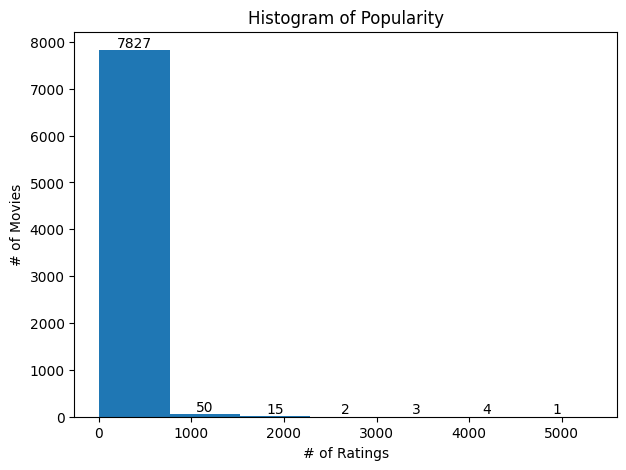

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
_, _, bars = plt.hist(all_ratings['title'].value_counts(), bins=7)
plt.bar_label(bars)
plt.title('Histogram of Popularity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Movies')
plt.show()

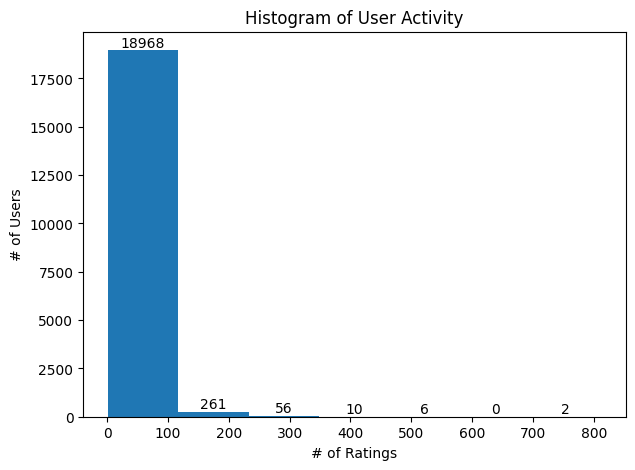

In [79]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(all_ratings['userId'].value_counts(), bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

#average rating and top 20 (too much 5.0)

In [80]:
average_ratings = all_ratings.groupby(["title"])["rating"].mean()
average_ratings.nlargest(100)

,rating
title,
'Tis the Season to be Merry (2021),5.0
A Compassionate Spy (2022),5.0
A Country Romance (2021),5.0
"A Godwink Christmas: Second Chance, First Love (2020)",5.0
A Holiday Homecoming (2021),5.0
...,...
"Lights, Camera, Romance (2021)",5.0
Look At Me: XXXTENTACION (2022),5.0
Lost & Found in Rome (2021),5.0


#Train, Validation, and Test Data

In [81]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(all_ratings, test_size=0.1, random_state=42)

ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [82]:
user_id_train = ratings_train['userId']
item_id_train = ratings_train['movieId']
rating_train = ratings_train['rating']

user_id_test = ratings_test['userId']
item_id_test = ratings_test['movieId']
rating_test = ratings_test['rating']

In [83]:
movies_not_train = list(set(all_ratings['movieId']) -set(item_id_train))
movies_not_train_name = set(all_ratings[all_ratings['movieId'].isin(movies_not_train)]['title'])

print(movies_not_train_name)

{'Frontiers (2023)', 'Running the Bases (2022)', 'Move the Grave (2020)', 'Werewolf Cabal (2022)', 'Seasoned With Love (2021)', 'Banging Lanie (2020)', 'Birdemic 3: Sea Eagle (2022)', 'Iké Boys (2022)', 'The Man Who Knew Too Much (2020)', 'Pakka Commercial (2022)', 'Confession (2023)', 'Titina (2022)', 'Klokkenluider (2023)', 'Clown Fear (2020)', 'Banksy Most Wanted (2020)', 'Downfalls High (2021)', 'As They Made Us (2022)', 'Come Fly with Me (2023)', 'Girlfriends and Girlfriends (2023)', 'Agent Revelation (2021)', 'Shatner in Space (2021)', 'Escape From Area Fifty One (2021)', 'The Barkers: Mind the Cats! (2020)', 'Unparalleled Mulan (2020)', 'The Reenactment (2021)', 'A Crafty Christmas Romance (2020)', 'Toyen: The Subversive Baroness Of Surrealism (2022)', 'Frank & Zed (2020)', 'Far Far Away (2022)', 'Voices (2020)', 'Him (2021)', 'Shark (2022)', 'Dads (2022)', 'All the Names of God (2023)', "Mama's Boy (2022)", 'Finnick (2022)', 'A Bunch of Amateurs (2022)', 'The Mare (2020)', 'The

#Data Load and Batching

In [84]:
import torch
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [85]:
def df_2_tensor(df, device):
    # return a triplet user_num, item_num, rating from the dataframe
    user_num = np.asarray(df['userId'])
    item_num = np.asarray(df['movieId'])
    rating = np.asarray(df['rating'])
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device)

In [86]:
train_user_num, train_item_num, train_rating = df_2_tensor(ratings_train,device)

In [87]:
val_user_num, val_item_num, val_rating = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating = df_2_tensor(ratings_test,device)

Dataset and dataloader


In [88]:
def tensor_2_dataset(user,item,rating):
    # your code here
    # Hint: check the zip function
    return list(zip(user,item,rating))

def make_dataloader(dataset,bs,shuffle):
    # your code here
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [89]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating)

In [90]:
train_dataloader = make_dataloader(train_dataset,1024,True)
val_dataloader = make_dataloader(val_dataset,1024, False)
test_dataloader = make_dataloader(test_dataset,1024,False)

#The model

In [91]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [92]:
class ScaledEmbedding(nn.Embedding):
    """
    Embedding layer that initialises its values
    to using a normal variable scaled by the inverse
    of the embedding dimension.
    """
    def reset_parameters(self):
        """
        Initialize parameters.
        """

        self.weight.data.normal_(0, 1.0 / self.embedding_dim)
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)


class ZeroEmbedding(nn.Embedding):
    """
    Used for biases.
    """

    def reset_parameters(self):
        """
        Initialize parameters.
        """

        self.weight.data.zero_()
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)

In [93]:
class DotModel(nn.Module):

    def __init__(self,
                 num_users,
                 num_items,
                 embedding_dim=32):

        super(DotModel, self).__init__()

        self.embedding_dim = embedding_dim

        # TODO: generate user and item embeddigns using ScaledEmbedding
        # your code
        self.user_embeddings = ScaledEmbedding(num_users, embedding_dim)
        self.item_embeddings = ScaledEmbedding(num_items, embedding_dim)

        # TODO: generate bias embeddigns using ZeroEmbedding
        # your code
        self.user_biases = ZeroEmbedding(num_users, 1)
        self.item_biases = ZeroEmbedding(num_items, 1)


    def forward(self, user_ids, item_ids):
        #
        # your code
        #
        user_embedding = self.user_embeddings(user_ids)
        item_embedding = self.item_embeddings(item_ids)

        user_bias = self.user_biases(user_ids).squeeze()
        item_bias = self.item_biases(item_ids).squeeze()

        dot = torch.mul(user_embedding, item_embedding).sum(1)
        res = dot + user_bias + item_bias

        return res

In [94]:
total_user_id = merged_data['userId'].nunique()  # Total number of unique users
total_item_id = merged_data['movieId'].nunique()  # Total number of unique items

total_user_id, total_item_id


(200948, 84432)

In [95]:
net = DotModel(total_user_id,total_item_id).to(device)
net

DotModel(
  (user_embeddings): ScaledEmbedding(200948, 32)
  (item_embeddings): ScaledEmbedding(84432, 32)
  (user_biases): ZeroEmbedding(200948, 1)
  (item_biases): ZeroEmbedding(84432, 1)
)

In [96]:
batch_user, batch_item, batch_rating = next(iter(train_dataloader))
batch_user, batch_item, batch_rating = batch_user.to(device), batch_item.to(device), batch_rating.to(device)

In [97]:
predictions = net(batch_user, batch_item)
predictions.shape

torch.Size([1024])

MSE loss


In [100]:
def regression_loss(predicted_ratings, observed_ratings):
    return ((observed_ratings - predicted_ratings) ** 2).mean()


In [101]:
loss=regression_loss(predictions,batch_rating)

In [102]:
loss

tensor(12.1305, dtype=torch.float64, grad_fn=<MeanBackward0>)

#Train and test model

In [103]:
class FactorizationModel(object):

    def __init__(self, embedding_dim=32, n_iter=10, l2=0.0,
                 learning_rate=1e-2, device=device, net=None, num_users=None,
                 num_items=None,random_state=None):

        self._embedding_dim = embedding_dim
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._l2 = l2
        self._device = device
        self._num_users = num_users
        self._num_items = num_items
        self._net = net
        self._optimizer = None
        self._loss_func = None
        self._random_state = random_state or np.random.RandomState()


    def _initialize(self):
        if self._net is None:
            self._net = DotModel(self._num_users, self._num_items, self._embedding_dim).to(self._device)

        self._optimizer = optim.Adam(
                self._net.parameters(),
                lr=self._learning_rate,
                weight_decay=self._l2
            )

        self._loss_func = regression_loss

    @property
    def _initialized(self):
        return self._optimizer is not None


    def fit(self, dataloader, val_dataloader, verbose=True):
        if not self._initialized:
            self._initialize()

        valid_loss_min = np.Inf # track change in validation loss
        train_losses, valid_losses, valid_maes =[], [], []

        for epoch_num in range(self._n_iter):
            tot_train_loss = 0.0
            ###################
            # train the model #
            ###################
            #TODO: trainining loop:
            # your code
            self._net.train()
            for batch_user, batch_item, batch_rating in dataloader:

                bath_user=batch_user.to(device)
                batch_item=batch_item.to(device)
                batch_rating=batch_rating.to(device)

                #1. Compute the output
                predictions = self._net(batch_user,batch_item)
                #2. Compute the loss
                #loss = self._loss_func(predictions,batch_rating)
                loss = self._loss_func(predictions,batch_rating)
                # 3. Zero out the gradient
                self._optimizer.zero_grad()
                # 4. Backward pass, compute the new gradients
                loss.backward()
                # 5. Update the weights
                self._optimizer.step()

                tot_train_loss += loss.item()


            train_loss = tot_train_loss /len(dataloader)
            # Go to the validation loop
            valid_loss, valid_mae = self.test(val_dataloader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_maes.append(valid_mae)

            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}'.format(epoch_num, train_loss,valid_loss))

            if np.isnan(train_loss) or train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(train_loss))

            #TODO: Saving model if validation loss has decreased
            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              torch.save(self._net.state_dict(), 'model_cf.pt')
              valid_loss_min = valid_loss

        return train_losses, valid_losses, valid_maes


    ######################
    # validate/Test the model #
    ######################
    def test(self,dataloader, verbose = False):
        self._net.eval()
        L1loss = torch.nn.L1Loss()
        tot_test_loss = 0.0
        tot_test_mae = 0.0

        # TODO: validation/testing loop
        # your code here (mae = mean absolute error)
        with torch.no_grad():
          for batch_user, batch_item, batch_rating in dataloader:
            #1. compute the output
            predictions = self._net(batch_user,batch_item)
            #2. Compute the loss
            loss = self._loss_func(predictions,batch_rating)

            tot_test_loss += loss.item()
            tot_test_mae += L1loss(predictions,batch_rating.type(torch.FloatTensor).to(device))


        test_loss = tot_test_loss / len(dataloader)
        test_mae = tot_test_mae / len(dataloader)
        if verbose:
            print(f"RMSE: {np.sqrt(test_loss)}, MAE: {test_mae}")
        return test_loss, test_mae

In [104]:
model = FactorizationModel(embedding_dim=50,  # latent dimensionality
                                   n_iter=40,  # number of epochs of training
                                   learning_rate=5e-4,
                                   l2=1e-8,  # strength of L2 regularization
                                   num_users=total_user_id,
                                   num_items=total_item_id)

In [105]:
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 11.880773830098104, loss_val 11.505952793644708
Validation loss decreased (inf --> 11.505953).  Saving model ...
Epoch 1: loss_train 10.43010245245656, loss_val 8.906438883723343
Validation loss decreased (11.505953 --> 8.906439).  Saving model ...
Epoch 2: loss_train 6.64396625139803, loss_val 4.92792031009275
Validation loss decreased (8.906439 --> 4.927920).  Saving model ...
Epoch 3: loss_train 3.646743615918257, loss_val 3.1426084094401405
Validation loss decreased (4.927920 --> 3.142608).  Saving model ...
Epoch 4: loss_train 2.461849182841007, loss_val 2.447549018177367
Validation loss decreased (3.142608 --> 2.447549).  Saving model ...
Epoch 5: loss_train 1.9153395026764557, loss_val 2.0754535325503594
Validation loss decreased (2.447549 --> 2.075454).  Saving model ...
Epoch 6: loss_train 1.5917918355359417, loss_val 1.8368968165338038
Validation loss decreased (2.075454 --> 1.836897).  Saving model ...
Epoch 7: loss_train 1.3731267265890672, loss_val 1.67

plot loss

In [106]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

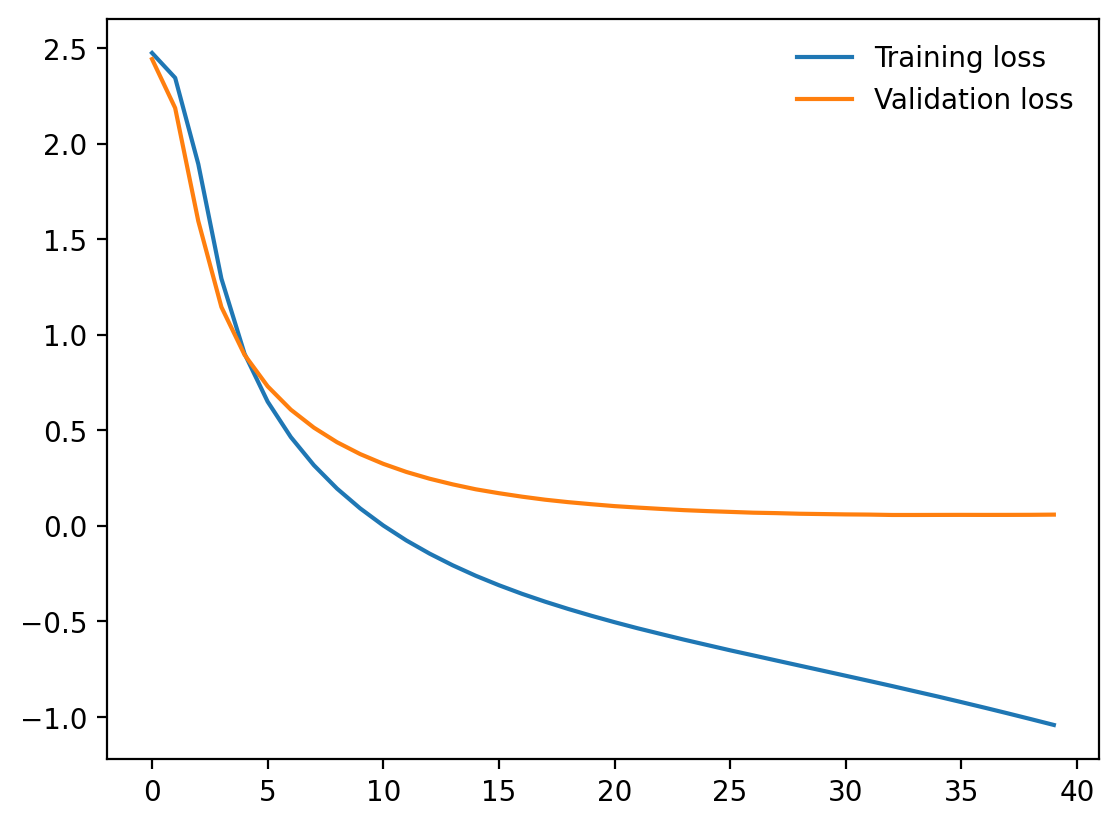

In [107]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)

In [108]:
model._net.load_state_dict(torch.load('model_cf.pt'))
test_loss, test_mae = model.test(test_dataloader,True)

RMSE: 1.0003066675476113, MAE: 0.691552460193634


<ipython-input-108-10f034373507>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model._net.load_state_dict(torch.load('model_cf.pt'))


#Optimize model


In [109]:
model_tuning = FactorizationModel(embedding_dim=128, # embedding_dim 50 --> 128
                  n_iter=20,
                  learning_rate=5e-4,
                  l2=5e-8,  # l2-penalty 1e-8 --> 5e-8
                  num_users=total_user_id,
                  num_items=total_item_id)
train_losses,test_losses, test_maes = model_tuning.fit(train_dataloader,val_dataloader)


Epoch 0: loss_train 11.654316988301847, loss_val 10.175935257861127
Validation loss decreased (inf --> 10.175935).  Saving model ...
Epoch 1: loss_train 6.632087116586538, loss_val 4.0962191565992905
Validation loss decreased (10.175935 --> 4.096219).  Saving model ...
Epoch 2: loss_train 2.93411118388769, loss_val 2.5673328708088174
Validation loss decreased (4.096219 --> 2.567333).  Saving model ...
Epoch 3: loss_train 1.9525492281784078, loss_val 2.0238246993944635
Validation loss decreased (2.567333 --> 2.023825).  Saving model ...
Epoch 4: loss_train 1.5125448315525294, loss_val 1.7350034598229656
Validation loss decreased (2.023825 --> 1.735003).  Saving model ...
Epoch 5: loss_train 1.258000334559762, loss_val 1.557702099608833
Validation loss decreased (1.735003 --> 1.557702).  Saving model ...
Epoch 6: loss_train 1.0922357696955998, loss_val 1.4385727852080603
Validation loss decreased (1.557702 --> 1.438573).  Saving model ...
Epoch 7: loss_train 0.9768372851637762, loss_val 

In [111]:
torch.save(model_tuning._net.state_dict(), 'model_cf_tuned.pt')

In [112]:
model_tuning._net.load_state_dict(torch.load('model_cf_tuned.pt'))
test_loss, test_mae = model_tuning.test(test_dataloader,verbose=True)

<ipython-input-112-a1169bb0c22d>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_tuning._net.load_state_dict(torch.load('model_cf_tuned.pt'))


RMSE: 1.0150981418253053, MAE: 0.6959798336029053
